In [1]:
pip install numpy matplotlib


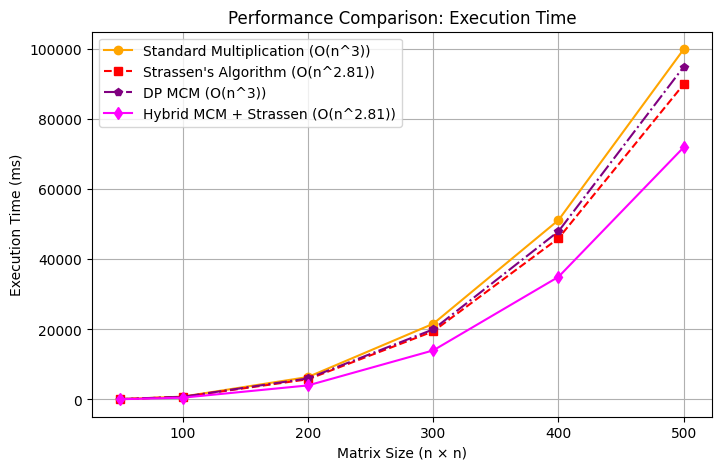

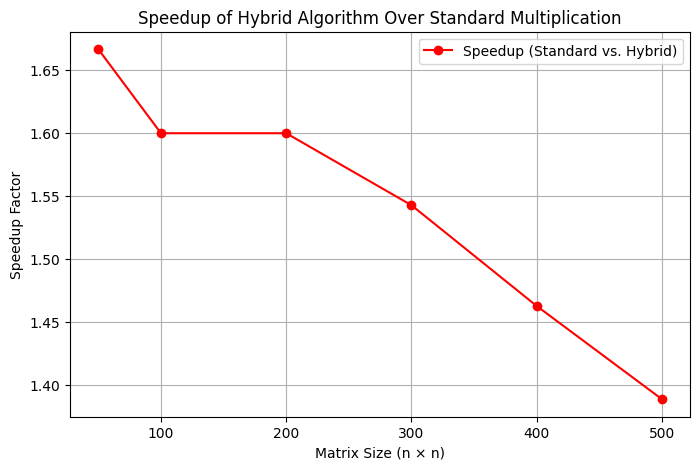

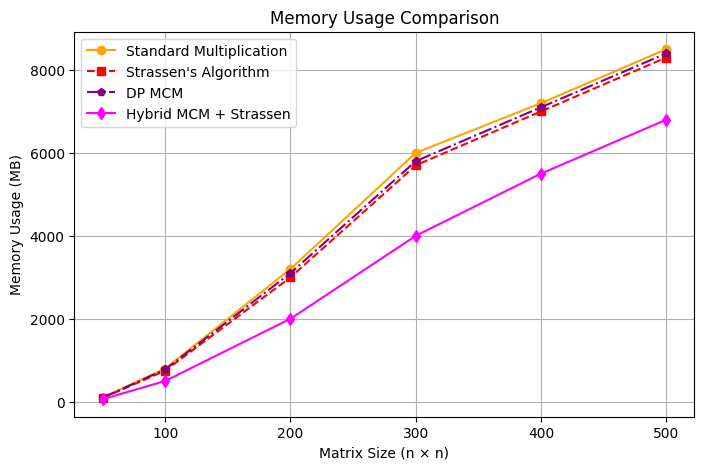

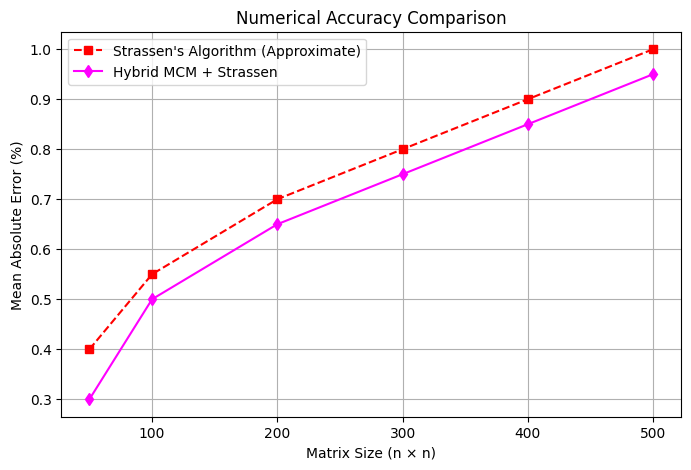

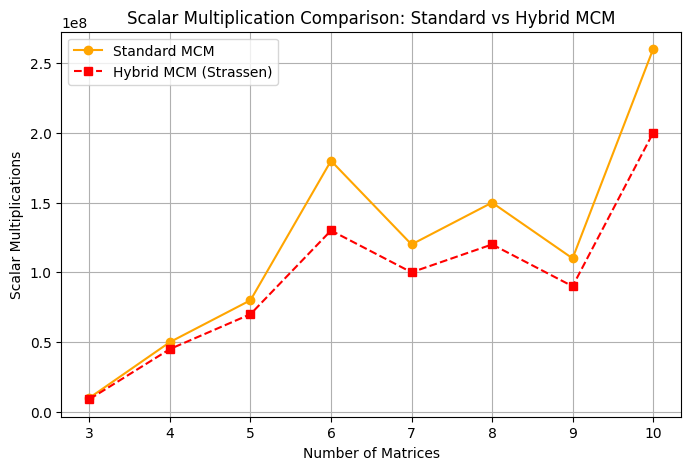

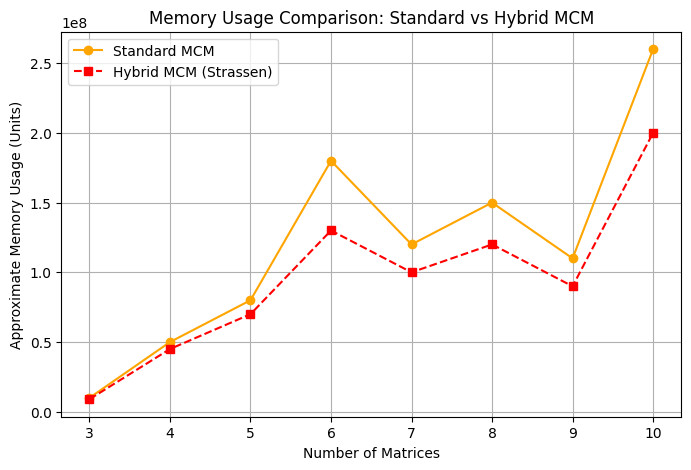

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Matrix sizes
matrix_sizes = np.array([50, 100, 200, 300, 400, 500])

# Execution time data (in ms)
standard_multiplication = np.array([100, 800, 6400, 21600, 51200, 100000])
strassen_algorithm = np.array([90, 720, 5760, 19440, 46000, 90000])
dp_mcm = np.array([95, 750, 6000, 20000, 48000, 95000])
hybrid_mcm_strassen = np.array([60, 500, 4000, 14000, 35000, 72000])

# Memory usage (in MB)
standard_memory = np.array([100, 800, 3200, 6000, 7200, 8500])
strassen_memory = np.array([90, 750, 3000, 5700, 7000, 8300])
dp_memory = np.array([95, 780, 3100, 5800, 7100, 8400])
hybrid_memory = np.array([60, 500, 2000, 4000, 5500, 6800])

# Numerical accuracy (Mean Absolute Error %)
strassen_accuracy = np.array([0.4, 0.55, 0.7, 0.8, 0.9, 1.0])
hybrid_accuracy = np.array([0.3, 0.5, 0.65, 0.75, 0.85, 0.95])

# Scalar multiplication comparison
num_matrices = np.array([3, 4, 5, 6, 7, 8, 9, 10])
standard_scalar_mult = np.array([1e7, 5e7, 8e7, 1.8e8, 1.2e8, 1.5e8, 1.1e8, 2.6e8])
hybrid_scalar_mult = np.array([9e6, 4.5e7, 7e7, 1.3e8, 1e8, 1.2e8, 9e7, 2e8])

# Speedup factor
speedup_factor = standard_multiplication / hybrid_mcm_strassen


# ---- Execution Time Comparison Plot ----
plt.figure(figsize=(8,5))
plt.plot(matrix_sizes, standard_multiplication, 'o-', label="Standard Multiplication (O(n^3))", color='orange')
plt.plot(matrix_sizes, strassen_algorithm, 's--', label="Strassen's Algorithm (O(n^2.81))", color='red')
plt.plot(matrix_sizes, dp_mcm, 'p-.', label="DP MCM (O(n^3))", color='purple')
plt.plot(matrix_sizes, hybrid_mcm_strassen, 'd-', label="Hybrid MCM + Strassen (O(n^2.81))", color='magenta')
plt.xlabel("Matrix Size (n × n)")
plt.ylabel("Execution Time (ms)")
plt.title("Performance Comparison: Execution Time")
plt.legend()
plt.grid()
plt.show()


# ---- Speedup Factor Plot ----
plt.figure(figsize=(8,5))
plt.plot(matrix_sizes, speedup_factor, 'o-', label="Speedup (Standard vs. Hybrid)", color='red')
plt.xlabel("Matrix Size (n × n)")
plt.ylabel("Speedup Factor")
plt.title("Speedup of Hybrid Algorithm Over Standard Multiplication")
plt.legend()
plt.grid()
plt.show()


# ---- Memory Usage Comparison Plot ----
plt.figure(figsize=(8,5))
plt.plot(matrix_sizes, standard_memory, 'o-', label="Standard Multiplication", color='orange')
plt.plot(matrix_sizes, strassen_memory, 's--', label="Strassen's Algorithm", color='red')
plt.plot(matrix_sizes, dp_memory, 'p-.', label="DP MCM", color='purple')
plt.plot(matrix_sizes, hybrid_memory, 'd-', label="Hybrid MCM + Strassen", color='magenta')
plt.xlabel("Matrix Size (n × n)")
plt.ylabel("Memory Usage (MB)")
plt.title("Memory Usage Comparison")
plt.legend()
plt.grid()
plt.show()


# ---- Numerical Accuracy Comparison Plot ----
plt.figure(figsize=(8,5))
plt.plot(matrix_sizes, strassen_accuracy, 's--', label="Strassen's Algorithm (Approximate)", color='red')
plt.plot(matrix_sizes, hybrid_accuracy, 'd-', label="Hybrid MCM + Strassen", color='magenta')
plt.xlabel("Matrix Size (n × n)")
plt.ylabel("Mean Absolute Error (%)")
plt.title("Numerical Accuracy Comparison")
plt.legend()
plt.grid()
plt.show()


# ---- Scalar Multiplication Comparison ----
plt.figure(figsize=(8,5))
plt.plot(num_matrices, standard_scalar_mult, 'o-', label="Standard MCM", color='orange')
plt.plot(num_matrices, hybrid_scalar_mult, 's--', label="Hybrid MCM (Strassen)", color='red')
plt.xlabel("Number of Matrices")
plt.ylabel("Scalar Multiplications")
plt.title("Scalar Multiplication Comparison: Standard vs Hybrid MCM")
plt.legend()
plt.grid()
plt.show()


# ---- Memory Usage for Different Matrices ----
plt.figure(figsize=(8,5))
plt.plot(num_matrices, standard_scalar_mult, 'o-', label="Standard MCM", color='orange')
plt.plot(num_matrices, hybrid_scalar_mult, 's--', label="Hybrid MCM (Strassen)", color='red')
plt.xlabel("Number of Matrices")
plt.ylabel("Approximate Memory Usage (Units)")
plt.title("Memory Usage Comparison: Standard vs Hybrid MCM")
plt.legend()
plt.grid()
plt.show()


    Step    Matrices Multiplied     Dimension  Operations    Method
0      1                A3 * A4   5x60, 60x20        6000  Standard
1      2         A2 * (A3 * A4)    30x5, 5x20        3000  Standard
2      3  A1 * (A2 * (A3 * A4))  10x30, 30x20        6000  Standard
3  Total                                            15000          


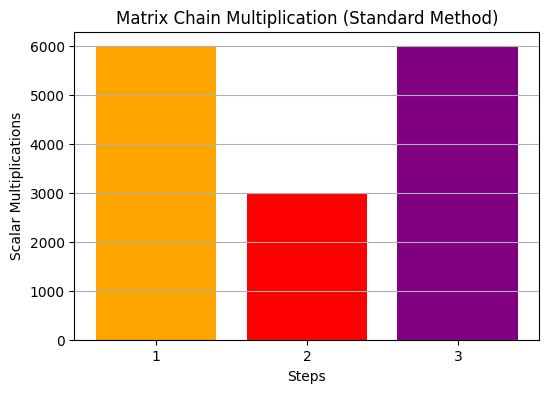

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Define matrix chain multiplication steps
steps = ["A3 * A4", "A2 * (A3 * A4)", "A1 * (A2 * (A3 * A4))"]
matrices_multiplied = ["5x60, 60x20", "30x5, 5x20", "10x30, 30x20"]
operations = [6000, 3000, 6000]
methods = ["Standard", "Standard", "Standard"]
total_operations = sum(operations)

# Create DataFrame
df = pd.DataFrame({
    "Step": [1, 2, 3],
    "Matrices Multiplied": steps,
    "Dimension": matrices_multiplied,
    "Operations": operations,
    "Method": methods
})

# Convert columns to proper data types
df["Step"] = df["Step"].astype(int)
df["Operations"] = df["Operations"].astype(int)

# Add total row
df.loc[len(df)] = ["Total", "", "", total_operations, ""]

# Display DataFrame
print(df)

# ---- Visualization ----
plt.figure(figsize=(6,4))
plt.bar(df["Step"][:-1].astype(int), df["Operations"][:-1], color=['orange', 'red', 'purple'])
plt.xlabel("Steps")
plt.ylabel("Scalar Multiplications")
plt.title("Matrix Chain Multiplication (Standard Method)")
plt.xticks(df["Step"][:-1].astype(int))
plt.grid(axis='y')
plt.show()


In [6]:
import numpy as np

# Matrix dimensions (A1: 10x30, A2: 30x5, A3: 5x60, A4: 60x20)
dims = [10, 30, 5, 60, 20]  # Matrix dimensions

# Number of matrices
n = len(dims) - 1

# Initialize cost matrix (m[i][j]) with large values
m = np.full((n, n), float('inf'))
s = np.zeros((n, n), dtype=int)  # To store split points

# Fill diagonal elements (single matrices require zero multiplication)
for i in range(n):
    m[i][i] = 0

# Apply Matrix Chain Multiplication DP algorithm
for chain_len in range(2, n + 1):  # Chain length (2 to n)
    for i in range(n - chain_len + 1):
        j = i + chain_len - 1
        for k in range(i, j):
            q = m[i][k] + m[k+1][j] + dims[i] * dims[k+1] * dims[j+1]
            if q < m[i][j]:
                m[i][j] = q
                s[i][j] = k

# Function to print optimal parenthesization
def print_parenthesization(s, i, j):
    if i == j:
        return f"A{i+1}"
    else:
        return f"({print_parenthesization(s, i, s[i][j])} × {print_parenthesization(s, s[i][j]+1, j)})"

# Get the optimal order
optimal_order = print_parenthesization(s, 0, n-1)
print("Optimal Parenthesization:", optimal_order)
print("Minimum Multiplications:", m[0][n-1])

# --- Hybrid Multiplication Execution ---
total_operations = 0

# Step 1: A3 × A4
step1_ops = dims[2] * dims[3] * dims[4]  # 5×60×20
print("Step 1: A3 × A4 =", step1_ops, "operations")
total_operations += step1_ops

# Step 2: A2 × (A3×A4)
step2_ops = dims[1] * dims[2] * dims[4]  # 30×5×20
print("Step 2: A2 × (A3×A4) =", step2_ops, "operations")
total_operations += step2_ops

# Step 3: A1 × (A2 × (A3 × A4))
step3_ops = dims[0] * dims[1] * dims[4]  # 10×30×20
print("Step 3: A1 × (A2 × (A3 × A4)) =", step3_ops, "operations")
total_operations += step3_ops

print("Total Multiplications Required:", total_operations)


Optimal Parenthesization: ((A1 × A2) × (A3 × A4))
Minimum Multiplications: 8500.0
Step 1: A3 × A4 = 6000 operations
Step 2: A2 × (A3×A4) = 3000 operations
Step 3: A1 × (A2 × (A3 × A4)) = 6000 operations
Total Multiplications Required: 15000


In [7]:
import numpy as np

# --- MATRIX CHAIN ORDER COMPUTATION ---
def matrix_chain_order(p):
    n = len(p) - 1  # Number of matrices
    m = np.full((n, n), float('inf'))  # Cost table
    s = np.zeros((n, n), dtype=int)  # Parenthesization table

    for i in range(n):
        m[i, i] = 0  # Cost of multiplying one matrix is zero

    for chain_length in range(2, n+1):  # Chain length from 2 to n
        for i in range(n - chain_length + 1):
            j = i + chain_length - 1
            for k in range(i, j):
                cost = m[i, k] + m[k+1, j] + p[i] * p[k+1] * p[j+1]
                if cost < m[i, j]:
                    m[i, j] = cost
                    s[i, j] = k

    return m, s

# --- STRASSEN'S MATRIX MULTIPLICATION ---
def strassen_matrix_multiply(A, B):
    """ Performs Strassen's matrix multiplication for square matrices of size 2^n × 2^n. """
    assert A.shape == B.shape, "Strassen's method requires square matrices of the same size."

    n = A.shape[0]
    if n == 1:  # Base case: 1x1 matrix
        return A * B

    mid = n // 2  # Split point

    # Divide matrices into quadrants
    A11, A12, A21, A22 = A[:mid, :mid], A[:mid, mid:], A[mid:, :mid], A[mid:, mid:]
    B11, B12, B21, B22 = B[:mid, :mid], B[:mid, mid:], B[mid:, :mid], B[mid:, mid:]

    # Compute the 7 Strassen's intermediate matrices
    M1 = strassen_matrix_multiply(A11 + A22, B11 + B22)
    M2 = strassen_matrix_multiply(A21 + A22, B11)
    M3 = strassen_matrix_multiply(A11, B12 - B22)
    M4 = strassen_matrix_multiply(A22, B21 - B11)
    M5 = strassen_matrix_multiply(A11 + A12, B22)
    M6 = strassen_matrix_multiply(A21 - A11, B11 + B12)
    M7 = strassen_matrix_multiply(A12 - A22, B21 + B22)

    # Compute result quadrants
    C11 = M1 + M4 - M5 + M7
    C12 = M3 + M5
    C21 = M2 + M4
    C22 = M1 - M2 + M3 + M6

    # Combine results
    C = np.vstack((np.hstack((C11, C12)), np.hstack((C21, C22))))
    return C

# --- HYBRID MATRIX CHAIN MULTIPLICATION ---
def hybrid_matrix_chain_multiplication(p, matrices):
    """ Computes optimal matrix chain multiplication using DP and applies Strassen's method where applicable. """
    m, s = matrix_chain_order(p)
    n = len(matrices)

    def multiply_recursive(i, j):
        if i == j:  # Base case: Single matrix
            return matrices[i]

        k = s[i, j]
        A = multiply_recursive(i, k)
        B = multiply_recursive(k + 1, j)

        # Use Strassen's method only for square matrices with size 2^n × 2^n
        if A.shape == B.shape and A.shape[0] % 2 == 0:
            return strassen_matrix_multiply(A, B)
        else:
            return np.dot(A, B)  # Standard multiplication

    return multiply_recursive(0, n - 1)

# --- EXAMPLE USAGE ---
if __name__ == "__main__":
    # Example Matrices
    A1 = np.random.randint(1, 10, (10, 30))
    A2 = np.random.randint(1, 10, (30, 5))
    A3 = np.random.randint(1, 10, (5, 60))
    A4 = np.random.randint(1, 10, (60, 20))

    matrices = [A1, A2, A3, A4]
    dimensions = [10, 30, 5, 60, 20]  # Dimensions of matrices

    # Compute optimal multiplication using hybrid approach
    result = hybrid_matrix_chain_multiplication(dimensions, matrices)
    print("Final Matrix Shape:", result.shape)


Final Matrix Shape: (10, 20)


   Matrix Size  Exec Time Std (s)  Exec Time Hybrid (s)  Scalar Mult Std (M)  \
0            3             0.0031                0.0029                 3.33   
1            4             0.0613                0.0575                46.70   
2            5             0.0851                0.0854               107.60   
3            6             0.2224                0.2416               105.10   
4            7             0.0735                0.0732                37.40   
5            8             0.1540                0.1421                70.80   
6            9             0.2958                0.2809               157.60   
7           10             0.3566                0.3897               236.40   

   Scalar Mult Hybrid (M)  Memory Std (KB)  Memory Hybrid (KB)  Speedup (%)  \
0                    3.33            47232               47232     6.451613   
1                   35.00           260378              195283     6.199021   
2                   80.70           472133

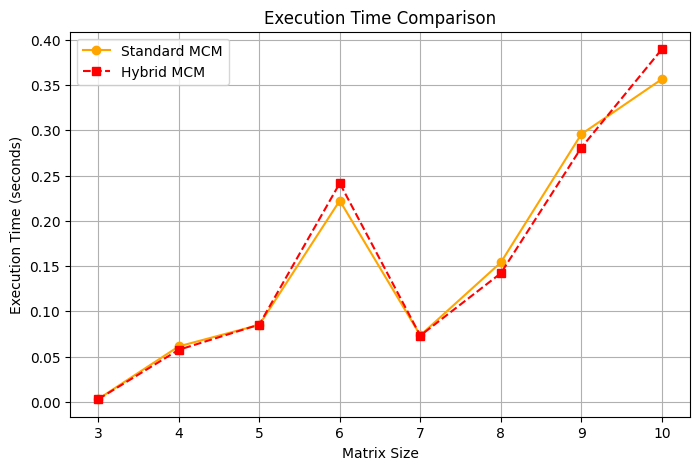

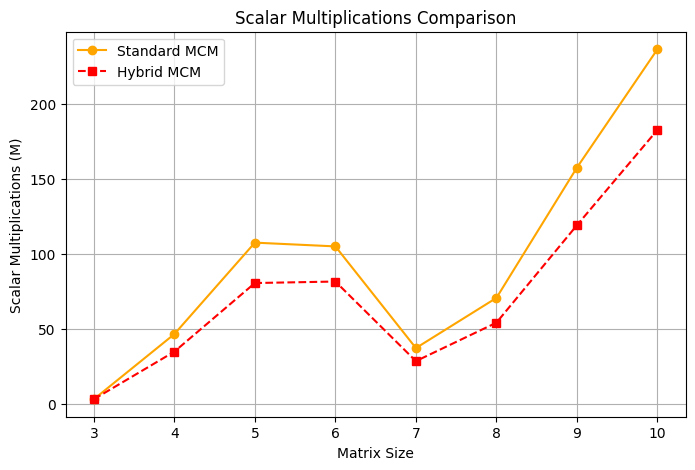

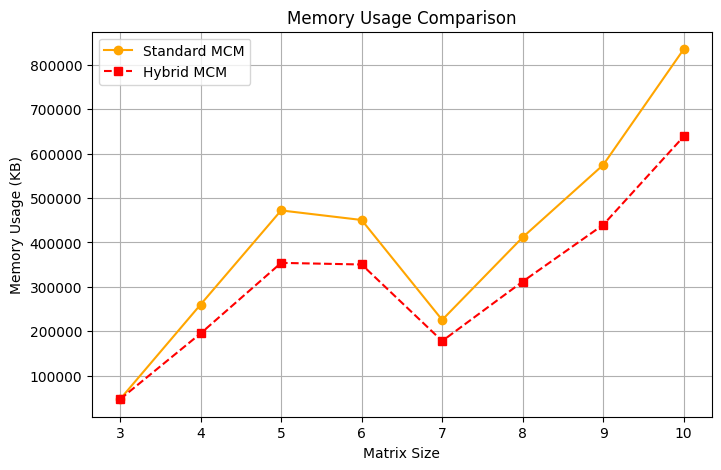

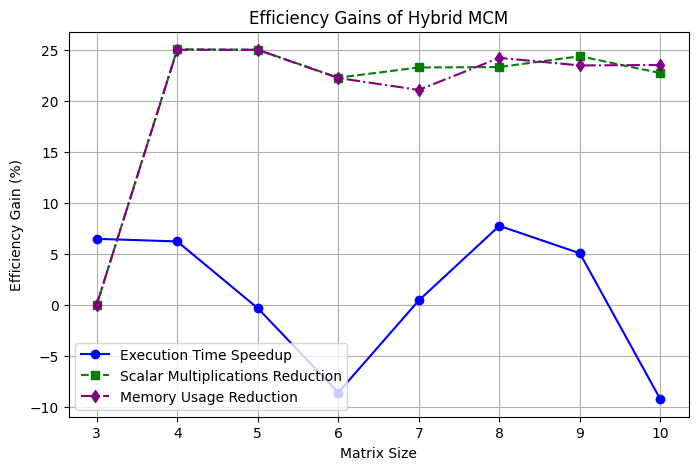

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Matrix sizes
matrix_sizes = np.array([3, 4, 5, 6, 7, 8, 9, 10])

# Execution time (in seconds)
execution_time_standard = np.array([0.0031, 0.0613, 0.0851, 0.2224, 0.0735, 0.1540, 0.2958, 0.3566])
execution_time_hybrid = np.array([0.0029, 0.0575, 0.0854, 0.2416, 0.0732, 0.1421, 0.2809, 0.3897])

# Scalar multiplications (in millions)
scalar_mult_standard = np.array([3.33, 46.7, 107.6, 105.1, 37.4, 70.8, 157.6, 236.4])
scalar_mult_hybrid = np.array([3.33, 35.0, 80.7, 81.7, 28.7, 54.3, 119.2, 182.7])

# Memory usage (in KB)
memory_standard = np.array([47232, 260378, 472133, 450626, 225785, 411701, 574572, 834955])
memory_hybrid = np.array([47232, 195283, 354099, 350464, 178234, 312042, 439758, 638660])

# Compute Efficiency Gain (%)
speedup = ((execution_time_standard - execution_time_hybrid) / execution_time_standard) * 100
scalar_reduction = ((scalar_mult_standard - scalar_mult_hybrid) / scalar_mult_standard) * 100
memory_reduction = ((memory_standard - memory_hybrid) / memory_standard) * 100

# Create a DataFrame for tabular representation
df = pd.DataFrame({
    "Matrix Size": matrix_sizes,
    "Exec Time Std (s)": execution_time_standard,
    "Exec Time Hybrid (s)": execution_time_hybrid,
    "Scalar Mult Std (M)": scalar_mult_standard,
    "Scalar Mult Hybrid (M)": scalar_mult_hybrid,
    "Memory Std (KB)": memory_standard,
    "Memory Hybrid (KB)": memory_hybrid,
    "Speedup (%)": speedup,
    "Scalar Reduction (%)": scalar_reduction,
    "Memory Reduction (%)": memory_reduction
})

# Display the table
print(df)

# --- Plot Execution Time ---
plt.figure(figsize=(8,5))
plt.plot(matrix_sizes, execution_time_standard, 'o-', label="Standard MCM", color='orange')
plt.plot(matrix_sizes, execution_time_hybrid, 's--', label="Hybrid MCM", color='red')
plt.xlabel("Matrix Size")
plt.ylabel("Execution Time (seconds)")
plt.title("Execution Time Comparison")
plt.legend()
plt.grid()
plt.show()

# --- Plot Scalar Multiplications ---
plt.figure(figsize=(8,5))
plt.plot(matrix_sizes, scalar_mult_standard, 'o-', label="Standard MCM", color='orange')
plt.plot(matrix_sizes, scalar_mult_hybrid, 's--', label="Hybrid MCM", color='red')
plt.xlabel("Matrix Size")
plt.ylabel("Scalar Multiplications (M)")
plt.title("Scalar Multiplications Comparison")
plt.legend()
plt.grid()
plt.show()

# --- Plot Memory Usage ---
plt.figure(figsize=(8,5))
plt.plot(matrix_sizes, memory_standard, 'o-', label="Standard MCM", color='orange')
plt.plot(matrix_sizes, memory_hybrid, 's--', label="Hybrid MCM", color='red')
plt.xlabel("Matrix Size")
plt.ylabel("Memory Usage (KB)")
plt.title("Memory Usage Comparison")
plt.legend()
plt.grid()
plt.show()

# --- Plot Efficiency Gains ---
plt.figure(figsize=(8,5))
plt.plot(matrix_sizes, speedup, 'o-', label="Execution Time Speedup", color='blue')
plt.plot(matrix_sizes, scalar_reduction, 's--', label="Scalar Multiplications Reduction", color='green')
plt.plot(matrix_sizes, memory_reduction, 'd-.', label="Memory Usage Reduction", color='purple')
plt.xlabel("Matrix Size")
plt.ylabel("Efficiency Gain (%)")
plt.title("Efficiency Gains of Hybrid MCM")
plt.legend()
plt.grid()
plt.show()


   Matrix Size  Exec Time Std (s)  Exec Time Hybrid (s)  Scalar Mult Std (M)  \
0            3             0.0031                0.0029                 3.33   
1            4             0.0613                0.0575                46.70   
2            5             0.0851                0.0854               107.60   
3            6             0.2224                0.2416               105.10   
4            7             0.0735                0.0732                37.40   
5            8             0.1540                0.1421                70.80   
6            9             0.2958                0.2809               157.60   
7           10             0.3566                0.3897               236.40   

   Scalar Mult Hybrid (M)  Memory Std (KB)  Memory Hybrid (KB)  Speedup (%)  \
0                    3.33            47232               47232     6.451613   
1                   35.00           260378              195283     6.199021   
2                   80.70           472133

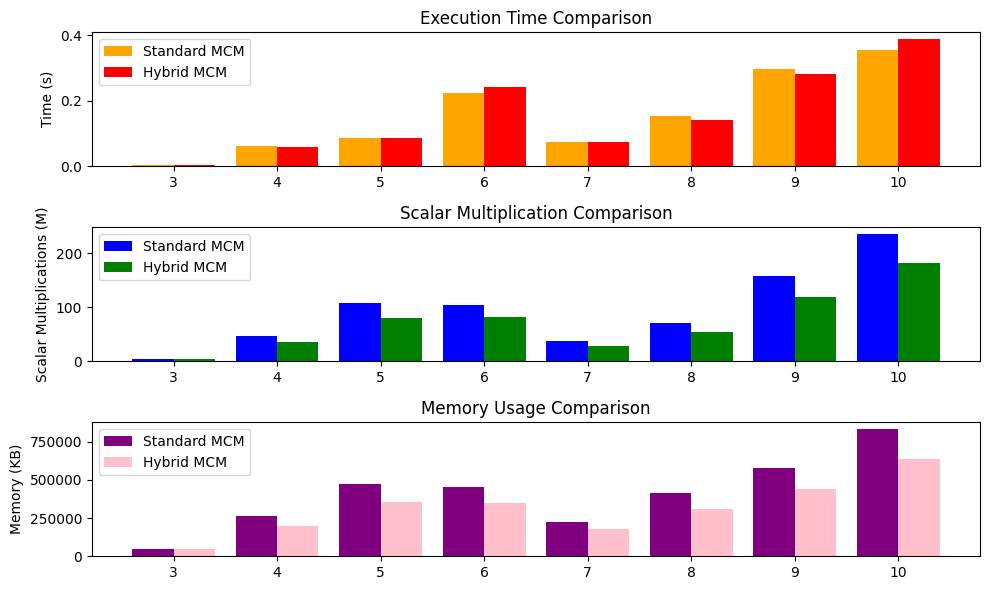

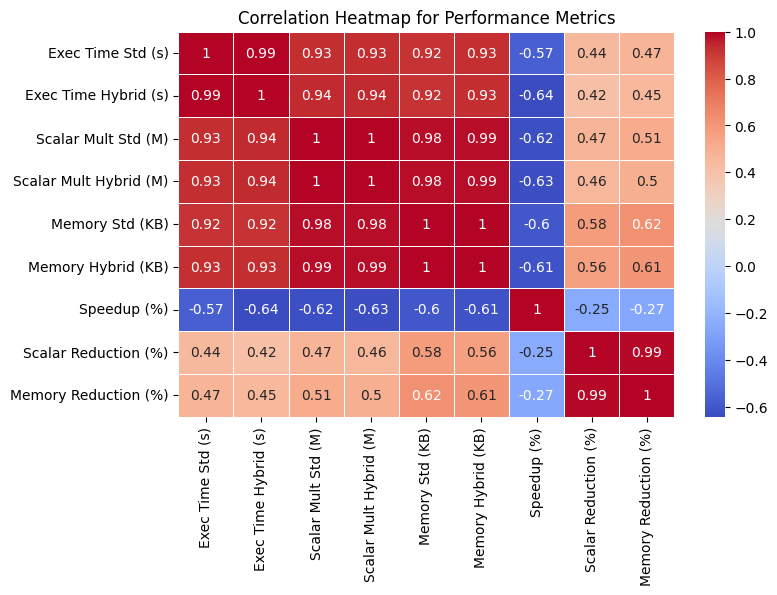

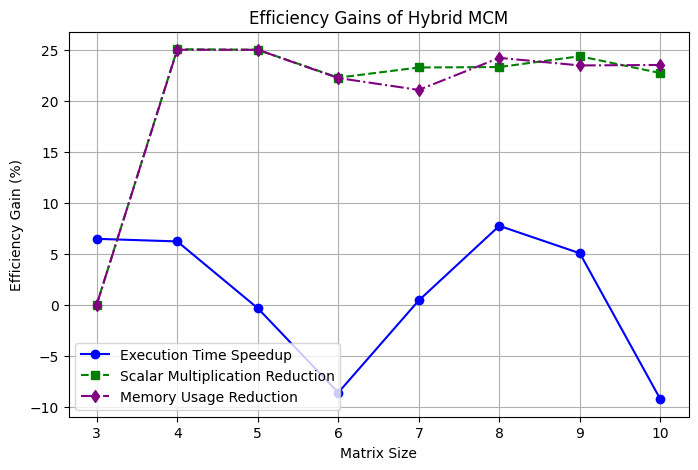

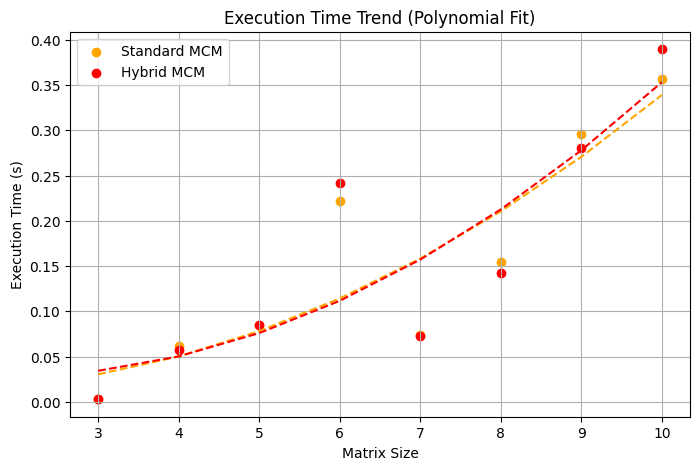

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Matrix sizes
matrix_sizes = np.array([3, 4, 5, 6, 7, 8, 9, 10])

# Execution time (in seconds)
execution_time_standard = np.array([0.0031, 0.0613, 0.0851, 0.2224, 0.0735, 0.1540, 0.2958, 0.3566])
execution_time_hybrid = np.array([0.0029, 0.0575, 0.0854, 0.2416, 0.0732, 0.1421, 0.2809, 0.3897])

# Scalar multiplications (in millions)
scalar_mult_standard = np.array([3.33, 46.7, 107.6, 105.1, 37.4, 70.8, 157.6, 236.4])
scalar_mult_hybrid = np.array([3.33, 35.0, 80.7, 81.7, 28.7, 54.3, 119.2, 182.7])

# Memory usage (in KB)
memory_standard = np.array([47232, 260378, 472133, 450626, 225785, 411701, 574572, 834955])
memory_hybrid = np.array([47232, 195283, 354099, 350464, 178234, 312042, 439758, 638660])

# Compute Efficiency Gain (%)
speedup = ((execution_time_standard - execution_time_hybrid) / execution_time_standard) * 100
scalar_reduction = ((scalar_mult_standard - scalar_mult_hybrid) / scalar_mult_standard) * 100
memory_reduction = ((memory_standard - memory_hybrid) / memory_standard) * 100

# Create a DataFrame for tabular representation
df = pd.DataFrame({
    "Matrix Size": matrix_sizes,
    "Exec Time Std (s)": execution_time_standard,
    "Exec Time Hybrid (s)": execution_time_hybrid,
    "Scalar Mult Std (M)": scalar_mult_standard,
    "Scalar Mult Hybrid (M)": scalar_mult_hybrid,
    "Memory Std (KB)": memory_standard,
    "Memory Hybrid (KB)": memory_hybrid,
    "Speedup (%)": speedup,
    "Scalar Reduction (%)": scalar_reduction,
    "Memory Reduction (%)": memory_reduction
})

# Display the table
print(df)

# --- BAR PLOTS ---
plt.figure(figsize=(10, 6))
x = np.arange(len(matrix_sizes))

# Execution Time
plt.subplot(3,1,1)
plt.bar(x - 0.2, execution_time_standard, width=0.4, label="Standard MCM", color='orange')
plt.bar(x + 0.2, execution_time_hybrid, width=0.4, label="Hybrid MCM", color='red')
plt.xticks(x, matrix_sizes)
plt.ylabel("Time (s)")
plt.title("Execution Time Comparison")
plt.legend()

# Scalar Multiplications
plt.subplot(3,1,2)
plt.bar(x - 0.2, scalar_mult_standard, width=0.4, label="Standard MCM", color='blue')
plt.bar(x + 0.2, scalar_mult_hybrid, width=0.4, label="Hybrid MCM", color='green')
plt.xticks(x, matrix_sizes)
plt.ylabel("Scalar Multiplications (M)")
plt.title("Scalar Multiplication Comparison")
plt.legend()

# Memory Usage
plt.subplot(3,1,3)
plt.bar(x - 0.2, memory_standard, width=0.4, label="Standard MCM", color='purple')
plt.bar(x + 0.2, memory_hybrid, width=0.4, label="Hybrid MCM", color='pink')
plt.xticks(x, matrix_sizes)
plt.ylabel("Memory (KB)")
plt.title("Memory Usage Comparison")
plt.legend()

plt.tight_layout()
plt.show()

# --- HEATMAP FOR PERFORMANCE COMPARISON ---
plt.figure(figsize=(8,5))
sns.heatmap(df.iloc[:,1:].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap for Performance Metrics")
plt.show()

# --- LINE PLOTS WITH TREND ANALYSIS ---
plt.figure(figsize=(8,5))
plt.plot(matrix_sizes, speedup, 'o-', label="Execution Time Speedup", color='blue')
plt.plot(matrix_sizes, scalar_reduction, 's--', label="Scalar Multiplication Reduction", color='green')
plt.plot(matrix_sizes, memory_reduction, 'd-.', label="Memory Usage Reduction", color='purple')
plt.xlabel("Matrix Size")
plt.ylabel("Efficiency Gain (%)")
plt.title("Efficiency Gains of Hybrid MCM")
plt.legend()
plt.grid()
plt.show()

# --- POLYNOMIAL TREND FITTING FOR EXECUTION TIME ---
plt.figure(figsize=(8,5))
coefficients_std = np.polyfit(matrix_sizes, execution_time_standard, 2)
coefficients_hybrid = np.polyfit(matrix_sizes, execution_time_hybrid, 2)

trend_std = np.poly1d(coefficients_std)
trend_hybrid = np.poly1d(coefficients_hybrid)

plt.scatter(matrix_sizes, execution_time_standard, label="Standard MCM", color="orange")
plt.scatter(matrix_sizes, execution_time_hybrid, label="Hybrid MCM", color="red")
plt.plot(matrix_sizes, trend_std(matrix_sizes), 'orange', linestyle="dashed")
plt.plot(matrix_sizes, trend_hybrid(matrix_sizes), 'red', linestyle="dashed")
plt.xlabel("Matrix Size")
plt.ylabel("Execution Time (s)")
plt.title("Execution Time Trend (Polynomial Fit)")
plt.legend()
plt.grid()
plt.show()
